In [1]:
import cartopy.crs as ccrs
import cmocean.cm as cmo
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
ersst_data = (
    xr.open_dataset("data/sst.mnmean.nc")
    .sst.sortby("lat")
    .sel(lat=slice(-40, 40), lon=slice(120, 290))
)
ersst_data

<xarray.DataArray 'sst' (time: 2040, lat: 41, lon: 86)>
[7193040 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -40.0 -38.0 -36.0 -34.0 -32.0 ... 34.0 36.0 38.0 40.0
  * lon      (lon) float32 120.0 122.0 124.0 126.0 ... 284.0 286.0 288.0 290.0
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2023-12-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]

In [3]:
clim_period = slice("1991", "2020")
ersst_clim = ersst_data.sel(time=clim_period).groupby("time.month").mean("time")
ersst_anom = ersst_data.groupby("time.month") - ersst_clim

/Users/dangomelon/mambaforge/envs/pangeo/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/dangomelon/mambaforge/envs/pangeo/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/Users/dangomelon/mambaforge/envs/pangeo/lib/python3.11/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/Users/dangomelon/mambaforge/envs/pangeo/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/dangomelon/mambaforge/envs/pangeo/lib/python3.11/site-packages

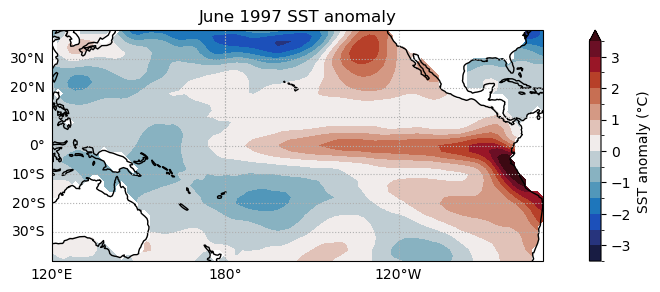

In [4]:
fig, ax = plt.subplots(
    figsize=(12, 3), subplot_kw=dict(projection=ccrs.PlateCarree(central_longitude=180))
)
ersst_anom.sel(time="1997-06").squeeze().plot.contourf(
    ax=ax,
    cmap=cmo.balance,
    levels=[-3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5],
    transform=ccrs.PlateCarree(),
    cbar_kwargs=dict(label="SST anomaly (°C)"),
)
ax.coastlines()
# ax.set_extent([120, 290, -40, 40], crs=ccrs.PlateCarree())

gl = ax.gridlines(draw_labels=True, linestyle=":")
gl.xlabels_top = False
gl.ylabels_right = False

ax.set_title("June 1997 SST anomaly")
fig.savefig("imgs/ersst_anom.png", bbox_inches="tight", dpi=300)

In [5]:
ersst_anom = ersst_anom.drop("month")
ersst_anom.name = "ssta"
ersst_anom

<xarray.DataArray 'ssta' (time: 2040, lat: 41, lon: 86)>
array([[[-0.83719826, -0.63569355, -0.44040203, ..., -1.0575886 ,
                 nan,         nan],
        [-1.1352797 , -0.8950596 , -0.6080017 , ..., -1.1332817 ,
                 nan,         nan],
        [-1.446022  , -1.200819  , -0.8150425 , ..., -1.0842953 ,
                 nan,         nan],
        ...,
        [        nan, -0.04243898, -1.0954094 , ...,  1.0134697 ,
          0.6258373 ,  0.3779354 ],
        [ 1.7564936 ,  0.873147  , -0.3308835 , ...,  0.78328514,
          0.4420643 ,  0.21725178],
        [ 2.1799908 ,  1.3715537 ,  0.09140205, ...,  0.43752575,
          0.03098583, -0.24463177]],

       [[-1.2107496 , -1.0465031 , -0.9191885 , ..., -1.1647444 ,
                 nan,         nan],
        [-1.3184109 , -1.1101646 , -0.92209244, ..., -1.2969398 ,
                 nan,         nan],
        [-1.404686  , -1.1924438 , -0.94358635, ..., -1.3188248 ,
                 nan,         nan],
...
        [        nan,  1.5590086 ,  1.4221697 , ...,  0.26469803,
          0.09897804, -0.10217476],
        [ 1.692791  ,  1.6458073 ,  1.5567093 , ...,  0.49669838,
          0.3439865 ,  0.13207245],
        [ 1.7470303 ,  1.7291155 ,  1.6705761 , ...,  0.6507883 ,
          0.5812292 ,  0.41764736]],

       [[ 0.61741734,  0.57468987,  0.51083374, ..., -0.43864918,
                 nan,         nan],
        [ 0.69365025,  0.65730286,  0.6126251 , ..., -0.391922  ,
                 nan,         nan],
        [ 0.7343521 ,  0.7110214 ,  0.6705208 , ..., -0.25311947,
                 nan,         nan],
        ...,
        [        nan,  0.24089241,  0.34957886, ...,  0.15654182,
          0.1835537 ,  0.19857788],
        [ 0.06440592,  0.18239403,  0.32717514, ...,  0.14941502,
          0.20836449,  0.2619362 ],
        [ 0.05093288,  0.17930365,  0.34008598, ...,  0.1810131 ,
          0.27440262,  0.30736637]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -40.0 -38.0 -36.0 -34.0 -32.0 ... 34.0 36.0 38.0 40.0
  * lon      (lon) float32 120.0 122.0 124.0 126.0 ... 284.0 286.0 288.0 290.0
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2023-12-01

In [6]:
ersst_anom.isel(time=slice(1, -4)).to_netcdf("data/ersst_pacific_anom.nc")

In [7]:
en34 = ersst_anom.sel(lat=slice(-5, 5), lon=slice(190, 240)).mean(("lat", "lon"))
oni = en34.rolling(time=3, center=True).mean().dropna("time")

In [8]:
# 0 for neutral, 1 for nino, 2 for nina

# nino when oni is above 0.5 for 5 consecutive months
nino = ((oni > 0.5).astype(int).rolling(time=5).sum() == 5).astype(int)
nino = nino.where(nino).bfill("time", limit=4).fillna(0)

# nina when oni is below -0.5 for 5 consecutive months
nina = ((oni < -0.5).astype(int).rolling(time=5).sum() == 5).astype(int)
nina = nina.where(nina).bfill("time", limit=4).fillna(0)
nina = nina * 2

enso_class = nino + nina
enso_class.name = "enso_class"
enso_class

<xarray.DataArray 'enso_class' (time: 2038)>
array([0., 0., 0., ..., 1., 1., 1.])
Coordinates:
  * time     (time) datetime64[ns] 1854-02-01 1854-03-01 ... 2023-11-01

In [9]:
enso_class.to_netcdf("data/enso_class.nc")

In [10]:
class_labels = xr.open_dataarray("data/enso_class.nc")
labels = class_labels.rolling(time=3).construct("lead").shift(time=-3).dropna("time")
labels["lead"] = [1, 2, 3]
labels

<xarray.DataArray 'enso_class' (time: 2035, lead: 3)>
array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 2.],
       ...,
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])
Coordinates:
  * time     (time) datetime64[ns] 1854-02-01 1854-03-01 ... 2023-08-01
  * lead     (lead) int64 1 2 3

In [11]:
labels_df = labels.to_pandas().reset_index()
labels_df.columns = ["time", "lead_1", "lead_2", "lead_3"]
labels_df.to_csv("data/labels.csv", index=False)

In [16]:
ersst_anom.isel(time=-1, drop=True).to_netcdf("data/ersst_anom_dec2023.nc")